In [13]:
import sqlite3

conn = sqlite3.connect("attr_data.db")

cursor = conn.cursor()





In [14]:
Employees = pd.read_sql_query("SELECT * FROM attrition_records",conn)
Employees.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [15]:
Employees.set_index('id', drop=True, inplace=True)
Employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
Employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 1470
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
Employees.shape

(1470, 35)

In [19]:
Employees.isnull().sum(axis=0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

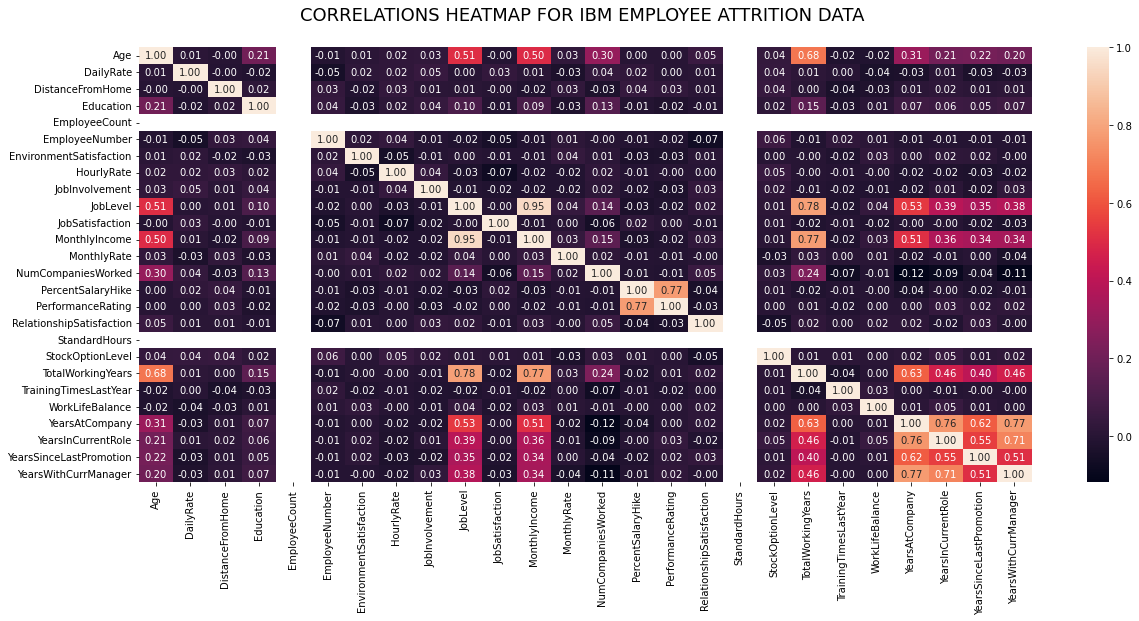

In [48]:
#Question 1
plt.figure(figsize=[20,8])
sns.heatmap(Employees.corr(), annot=True, fmt='.2f');
plt.title("Correlations heatmap for IBM employee attrition data \n".upper(), fontdict={'fontsize': 18}, loc='center');

Answer Question 1: 3 factors behind employee attrition include;
    1. Monthly Income
    2. JOb Level
    3. Total working years

Correlation Coeff. is: 0.095


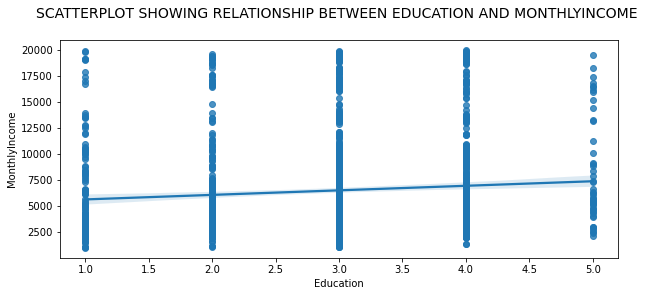

In [61]:
#Question 2: Relationship between education and monthly income
plt.figure(figsize=[10,4])
sns.regplot(data=Employees, x='Education', y='MonthlyIncome')
corr_ = Employees['Education'].corr(Employees['MonthlyIncome']).round(4)
print("Correlation Coeff. is: {}".format(corr_));
plt.title("Scatterplot showing relationship between education and monthlyincome \n".upper(), fontdict={'fontsize': 14}, loc='center'); 

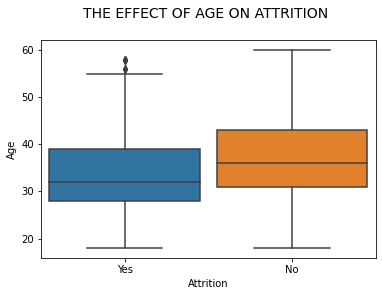

In [59]:
# Question 3 method 1
plt.figure(figsize=[6,4])
sns.boxplot(data=Employees, x='Attrition', y='Age',width=0.9, fliersize=5);
plt.title("The effect of age on attrition \n".upper(), fontdict={'fontsize': 14}, loc='center');

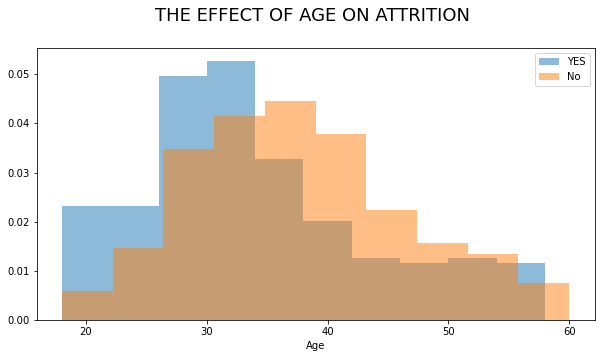

In [54]:
#Question 3 method 2
plt.figure(figsize=[10,5])
plt.hist(Employees[Employees['Attrition']=='Yes']['Age'], label='YES', alpha=0.5, density=True)
plt.hist(Employees[Employees['Attrition']=='No']['Age'], label='No', alpha=0.5, density=True)
plt.xlabel('Age')
plt.legend();
plt.title("The effect of age on attrition \n".upper(), fontdict={'fontsize': 18}, loc='center');

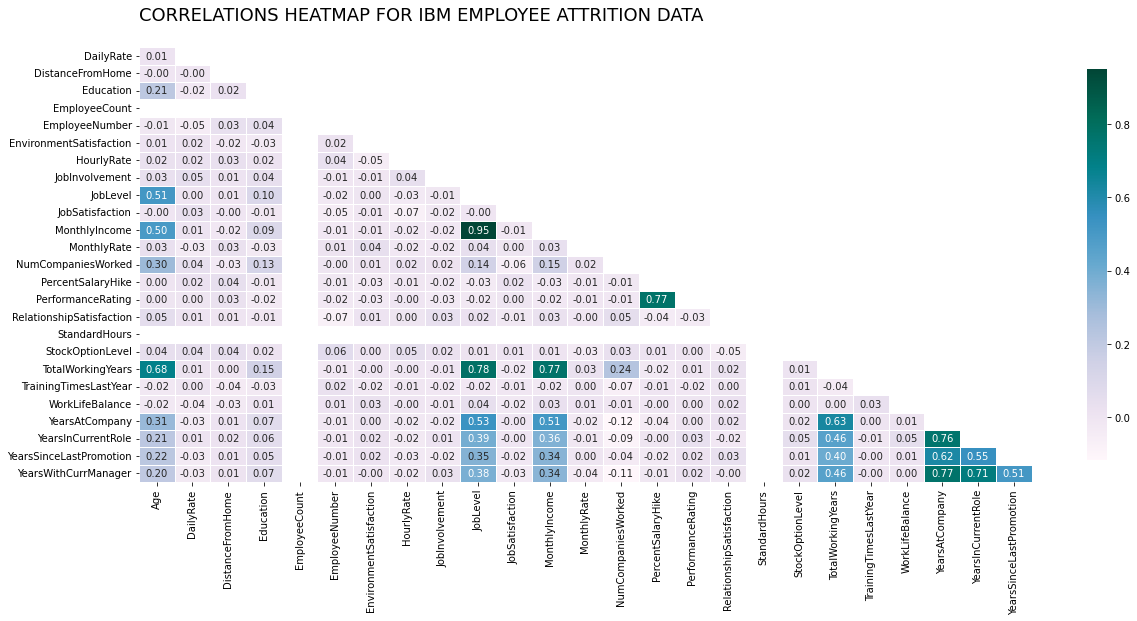

In [39]:
 #Question 4


corr = Employees.corr()

ones = np.ones_like(corr, dtype='bool') 
mask = np.triu(ones)
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
# Plot a customized heatmap of correlations for all numeric values
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='PuBuGn', linewidths=.6, cbar_kws={'shrink':.9})
ax.xaxis.tick_bottom()
plt.title("Correlations heatmap for IBM employee attrition data \n".upper(), fontdict={'fontsize': 18}, loc='left');

Answer Question 4: The heat map shows that monthly income is a main factor in employee attrition.

Text(0.5, 1.0, 'BARCHART SHOWING IMPACT OF WORKLIFEBALANCE ON ATTRITION RATE \n')

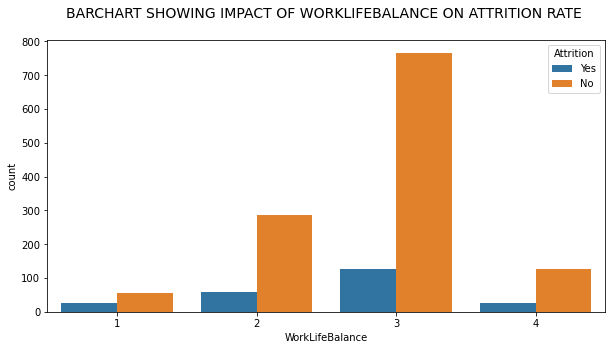

In [63]:
#Question 5
plt.figure(figsize=[10,5])
sns.countplot(data=Employees, x='WorkLifeBalance', hue='Attrition' );
plt.title("Barchart showing impact of worklifebalance on attrition rate \n".upper(), fontdict={'fontsize': 14}, loc='center') 
